# **Workshop: Building an Artificial Neural Network (ANN) for MNIST Classification**

## Prepared by:
- **Dr. Guelib Bouchra** 
- **Dr. Bechinia Hadjer** 
- **Dr. Bounab Rayene** 


Let's dive in and train some powerful models together! 🚀🔥

## 🤓 Meet Your Instructors 🎓

Introducing the AI Gurus, the Lords of the Layers, the Wizards of Weights! 🧙‍♂️💻

- **Dr. Neural Net** 🧠: Can backpropagate in his sleep!
- **Professor Epoch** ⏳: Believes training should never stop!
- **Sir Activation Function** ⚡: Switches between ReLU and Sigmoid faster than light!
- **Captain Overfit** 🚀: Always adding one more layer... just in case!
- **The Dropout Duo** 🎭: Regularizing everything, everywhere, all at once!

Let's dive in and train some powerful models together! 🚀🔥

## **Objective**
In this workshop, we will build a simple **Artificial Neural Network (ANN)** to classify handwritten digits using the **MNIST dataset**. The key goals are:
- Understand the structure of an ANN.
- Train an ANN using TensorFlow/Keras.
- Make predictions and visualize results.

---
# **Step One Build a simple ANN**
---



## **1. Load the Dataset**
- Import the MNIST dataset from `keras.datasets`.
- Load training images and labels.
- We will **not** use the test set in this workshop.

## **2. Preprocess the Data**
- Normalize pixel values to the range **[0,1]** for faster training.
- Flatten **28×28** images into a **1D array of 784 features**.





In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset (handwritten digits 0-9)
(x_train, y_train), (_, _) = keras.datasets.mnist.load_data()  # Ignore test set

# Normalize the pixel values (0-255) to range (0-1)
x_train = x_train / 255.0

# Flatten the images (from 28x28 to 784 input features)
x_train = x_train.reshape(-1, 28*28)



2025-02-11 11:19:01.498924: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-11 11:19:01.502020: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-11 11:19:01.512114: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739269141.530190    8350 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739269141.535408    8350 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 11:19:01.552334: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## **3. Define the ANN Model**
- Input Layer: **128 neurons** (Sigmoid activation).
- Hidden Layer: **64 neurons** (Sigmoid activation).
- Output Layer: **10 neurons** (Sigmoid activation).

## **4. Compile & Train the Model**
- Use **Adam optimizer** for efficient training.
- Use **Sparse Categorical Crossentropy** as the loss function.
- Train with **only one iteration** (`epochs=1`).
- Use the **entire dataset in one batch**.



In [3]:
# Define an ANN model with Sigmoid activation in all layers
model = keras.Sequential([
    keras.layers.Dense(128, activation='sigmoid', input_shape=(784,)),  # Input Layer
    keras.layers.Dense(64, activation='sigmoid'),  # Hidden Layer
    keras.layers.Dense(10, activation='sigmoid')  # Output Layer (10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



/home/linux/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-11 11:19:05.442698: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## **5. Make Predictions & Visualize Results**
- Predict the class of a sample digit.
- Display the image and the model’s predicted label.





In [4]:
# Train the model with only one iteration (epoch = 1) using all training data
model.fit(x_train, y_train, epochs=1, batch_size=len(x_train), verbose=1)

# Predict on some training images
predictions = model.predict(x_train)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step - accuracy: 0.0999 - loss: 2.4435
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step


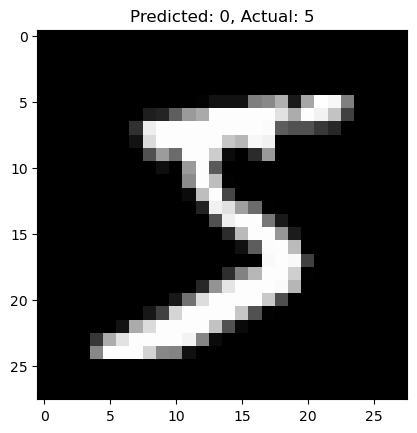

In [9]:
# Display a sample prediction
index = 0  # Change index to see different images
plt.imshow(x_train[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_train[index]}")
plt.show()


# **Step two: Increasing the Number of Iterations (Epochs)**

## **Objective**
In this step, we will modify the ANN training process by increasing the **number of iterations (epochs) from 1 to 10**.  
This will help us **observe the effect of multiple iterations on model performance**, particularly how **loss and accuracy** change over time.

---

## **Key Concept: Loss vs Cost**
🔹 **Loss**: The error for a single training example.  
🔹 **Cost**: The average loss over all training examples.

- When we **train for more epochs**, the loss **should decrease**, and the accuracy **should improve**.
- The cost function provides a **measure of how well the model is performing** over multiple epochs.

---

## **Modification**
- **Previous setting:** `epochs=1`
- **New setting:** `epochs=10`
- Everything else (model, activation functions, optimizer, dataset) **remains the same**.

---

## **Expected Outcome**
1. **Loss should decrease** over multiple epochs as the model learns better representations.
2. **Accuracy should increase** since the model has more opportunities to adjust weights.


---

## **Instructions**
- Change `epochs=1` to `epochs=10` in the training step:
```python
model.fit(x_train, y_train, epochs=10, batch_size=len(x_train), verbose=1) 🚀


In [6]:
# Can you try that by yourself ?


## Discussion

* Did the **loss** decrease compared to training with just 1 epoch?
* How did the **accuracy** improve after multiple iterations?
* Can we observe **overfitting** if we train for too many epochs?

---



# Step Three: Experimenting with Model Parameters

## Objective

In this step, we will explore how different **hyperparameters** affect the performance of our ANN model.  
We will modify:

1. **Activation functions**
2. **Loss functions**
3. **Optimizers**
4. **Number of layers and neurons**

By testing these changes, we can analyze their impact on **training performance, accuracy, and convergence speed**.

---



## 1 Changing the Activation Function

The activation function determines how neurons in the network process data.  
The default setting was **Sigmoid**, but we can try:

* **ReLU** (`activation='relu'`) - Helps with vanishing gradients.
* **Tanh** (`activation='tanh'`) - Centered at zero, useful for some cases.
* **Softmax** (`activation='softmax'`) - Typically used for output layers in classification.

🔹 **Modify the activation function in each layer**:

```python
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Output layer
])
```

---

In [ ]:
# Give it a  try that by yourself ?


## 2 Changing the Loss Function

The loss function determines how the model measures errors.  
The default was **Sparse Categorical Crossentropy**, but we can try:

* **Categorical Crossentropy** (`loss='categorical_crossentropy'`)
* **Mean Squared Error (MSE)** (`loss='mse'`) - Rarely used for classification.

🔹 **Modify the loss function** when compiling the model:

```python
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```

---


In [ ]:
# Did you understand ? show me!

## 3 Changing the Optimizer

Optimizers control how the model updates weights.  
The default was **Adam**, but we can try:

* **SGD (Stochastic Gradient Descent)** (`optimizer='sgd'`) - Simple but slower convergence.
* **RMSprop** (`optimizer='rmsprop'`) - Adaptive learning rate.
* **Adagrad** (`optimizer='adagrad'`) - Good for sparse data.

🔹 **Modify the optimizer when compiling the model**:

```python
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

---

In [ ]:
# Discover this point!

## 4 Adding More Layers

More layers can improve learning but may also lead to overfitting.  
Try:

* **Adding an extra hidden layer**.
* **Increasing/decreasing the number of neurons per layer**.

🔹 **Modify the model structure**:

```python
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(784,)),  # More neurons
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
```

---


In [ ]:
# Can you do it?

## 🔎 Experiment & Observe

Try different combinations and answer these questions:

* How does changing the **activation function** affect accuracy?
* Which **loss function** results in faster convergence?
* Does changing the **optimizer** improve training speed?
* How does adding **more layers** impact performance?

---

# Step Four:  Splitting the Data into Training and Testing Sets

### Objective

Now that we have experimented with model parameters, the next step is to **split the dataset** into training and testing sets.

### Why is Data Splitting Important?
- **Training Set**: Used to teach the model.
- **Testing Set**: Used to evaluate how well the model generalizes to unseen data.

### Task for You
🔹 **Modify the code to split the dataset into training and test sets.**
- Use `sklearn.model_selection.train_test_split` to create a test set (e.g., 20% of the data).
- Train the model only on the training set.
- Evaluate the model on the test set to measure accuracy.




In [8]:
# DO you think that you can do it ?

#  Step Five: Evaluating the Model Using Different Metrics

### Objective

Once we have split the dataset and trained our model, we need to evaluate its performance using different metrics. Accuracy alone is not always the best measure, especially in imbalanced datasets.

### Common Evaluation Metrics
- **Accuracy**: Measures the percentage of correctly predicted samples.
- **Precision**: Measures how many of the predicted positive cases were actually positive.
- **Recall (Sensitivity)**: Measures how many of the actual positive cases were correctly predicted.
- **F1 Score**: Harmonic mean of precision and recall, useful for imbalanced datasets.
- **Confusion Matrix**: Provides a breakdown of correct and incorrect predictions.

### Task for You
- **Modify the evaluation step to include multiple metrics.**

### You need:
- **Packages importation**:
- **Predict on the test set**: 
- **Generate classification report**:
- **Display confusion matrix**:


🔹 **Run the model evaluation with different metrics and analyze the results!**


In [ ]:
# we are almost theri, let's try one more time

# Step Six: Printing Loss and Accuracy During Training

## Objective

Now that we have evaluated the model using different metrics, the next step is to **track and print the loss and accuracy during training**.

## Why is This Important?
- Helps us **visualize the learning process**.
- Allows us to **detect overfitting**.
- Provides insight into how well the model is performing over epochs.

## Task for You
🔹 **Modify the training step to store and print the loss and accuracy values at each epoch.**
## You need to:
- **Plot training & validation accuracy values**:
- **Plot training & validation loss values**: 




In [ ]:
# This your final task, just try it :)